# The "Best" Neighboord?
We explore one way you could determine the so-called best neighborhood in Pittsburgh
## Introduction
Our metric measures the number of trees (who doesn't like trees?) per square mile against buglaries, robberies, and 311 complaints (also per capita). 311, in Pittsburgh, is a hotline where you can submit non-emergency concerns to the city. 
We figured that the number of trees in a neighborhood would offset the crimes and complaints, just because they are trees! Burglaries and Robberies aren't great, and complaints to the city are also pretty bad, but tress make everything better. In our analysis, a higher number is "better" than a lower one. We also thought about measuring Air Quality and the percentage of city-owned property in a given neighborhood, but decided that these metrics would be more fun.
## The Metrics
We measured 3 metrics as mentioned above:

### Crime (Buglaries and Robberies)
Using a [demographic dataset](https://data.wprdc.org/dataset/pgh), we calculated the number of robberies and burglaries per capita for each neighborhood. Let's visualize that data:

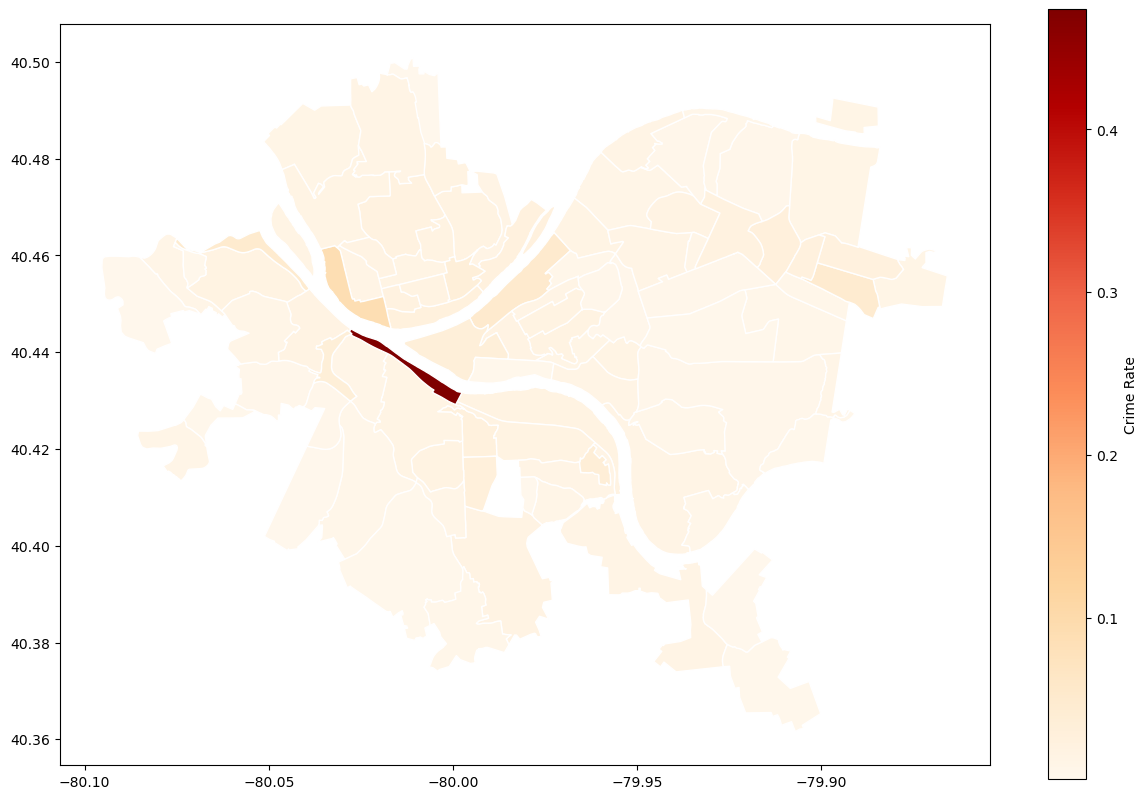

In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt


# Read in our shapefiles
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
# Read in our crime data (crime_pc.csv)
crime = pd.read_csv("crime_pc.csv")

crime_map = neighborhoods.merge(crime, left_on="hood", right_on="Neighborhood", how="left")
crime_map.plot(column="Crime Per Capita", cmap="OrRd", edgecolor="white", legend=True, legend_kwds={'label': "Crime Rate"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
plt.show()

Well we certainly have a "worst" neighborhood! Let's see what it looks like without that outlier:

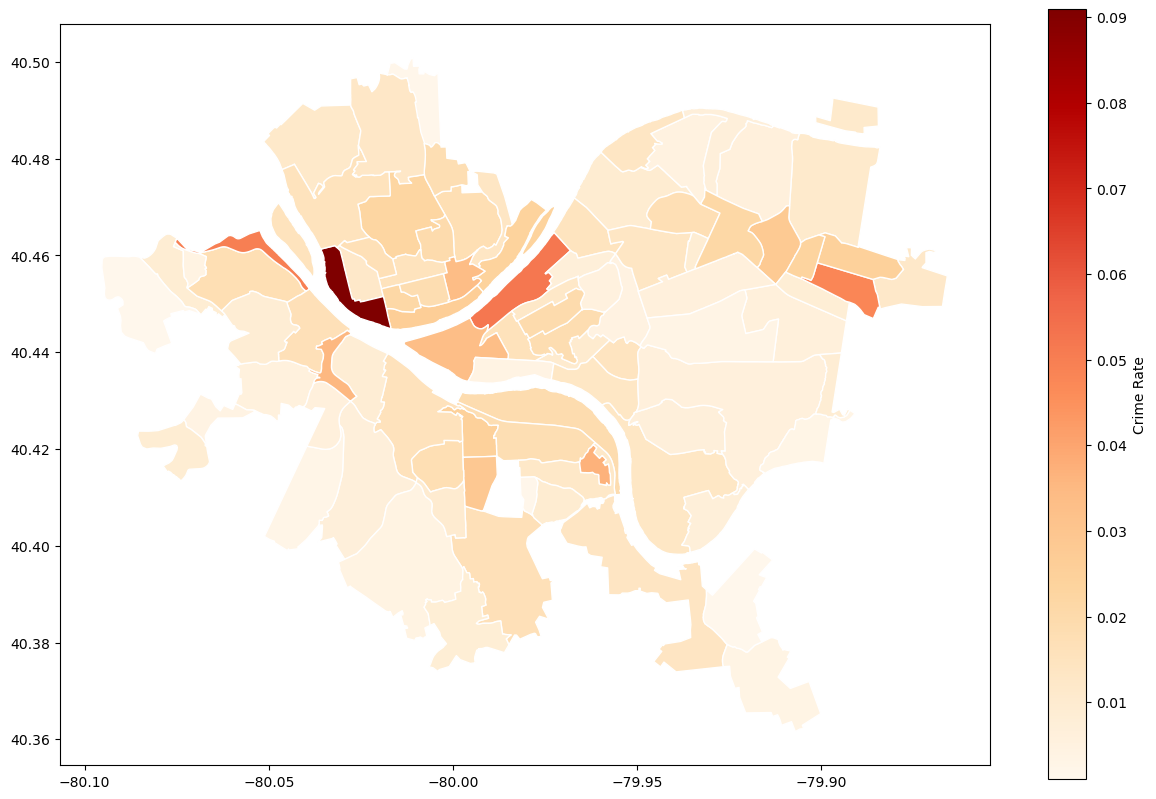

In [2]:
dropped=crime_map[crime_map["Neighborhood"] != "South Shore"]
dropped.plot(column="Crime Per Capita", cmap="OrRd", edgecolor="white", legend=True, legend_kwds={'label': "Crime Rate"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
plt.show()

That's a little more interesting looking.

## 311 Complaints
Let's look at a similar visualization for our findings with [this](https://data.wprdc.org/dataset/311-datas) dataset:

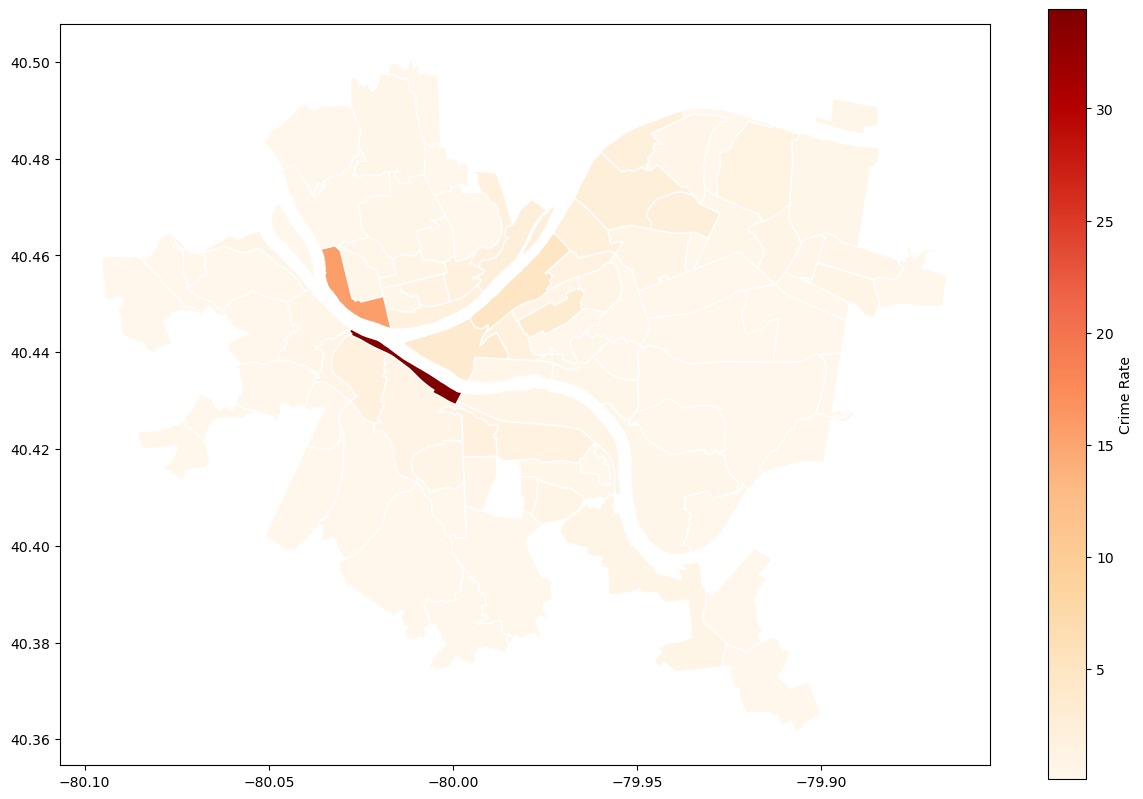

In [3]:
complaints = pd.read_csv("311_pc.csv")

complaints_map = neighborhoods.merge(complaints, left_on="hood", right_on="neighborhood", how="left")
complaints_map.plot(column="Complaints_per_capita", cmap="OrRd", edgecolor="white", legend=True, legend_kwds={'label': "Crime Rate"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
plt.show()

Alright... same problem as with South Shore. Let's do the same:

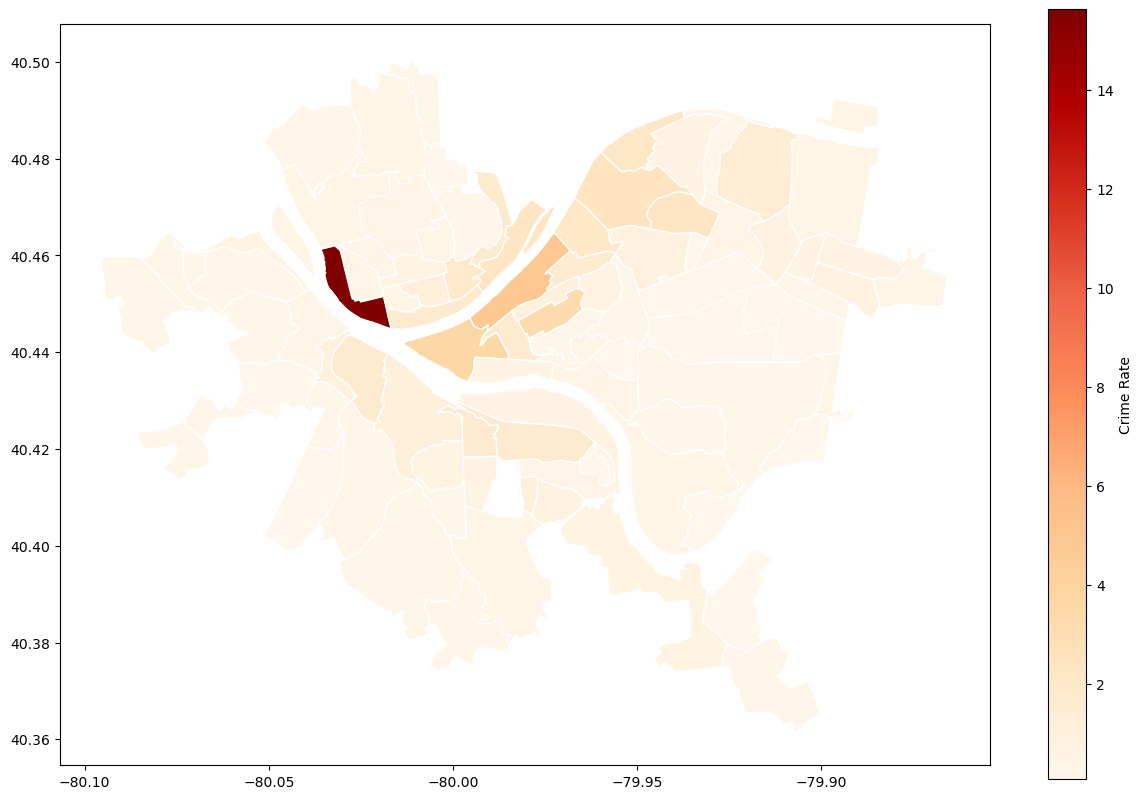

In [4]:
dropped_311=complaints_map[complaints_map["neighborhood"] != "South Shore"]
dropped_311.plot(column="Complaints_per_capita", cmap="OrRd", edgecolor="white", legend=True, legend_kwds={'label': "Crime Rate"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
plt.show()

## Trees
Finally, we used [this](https://data.wprdc.org/dataset/city-trees) dataset to measure the number of trees cared for by the city. The Darker the neighbood, the more trees per square mile.

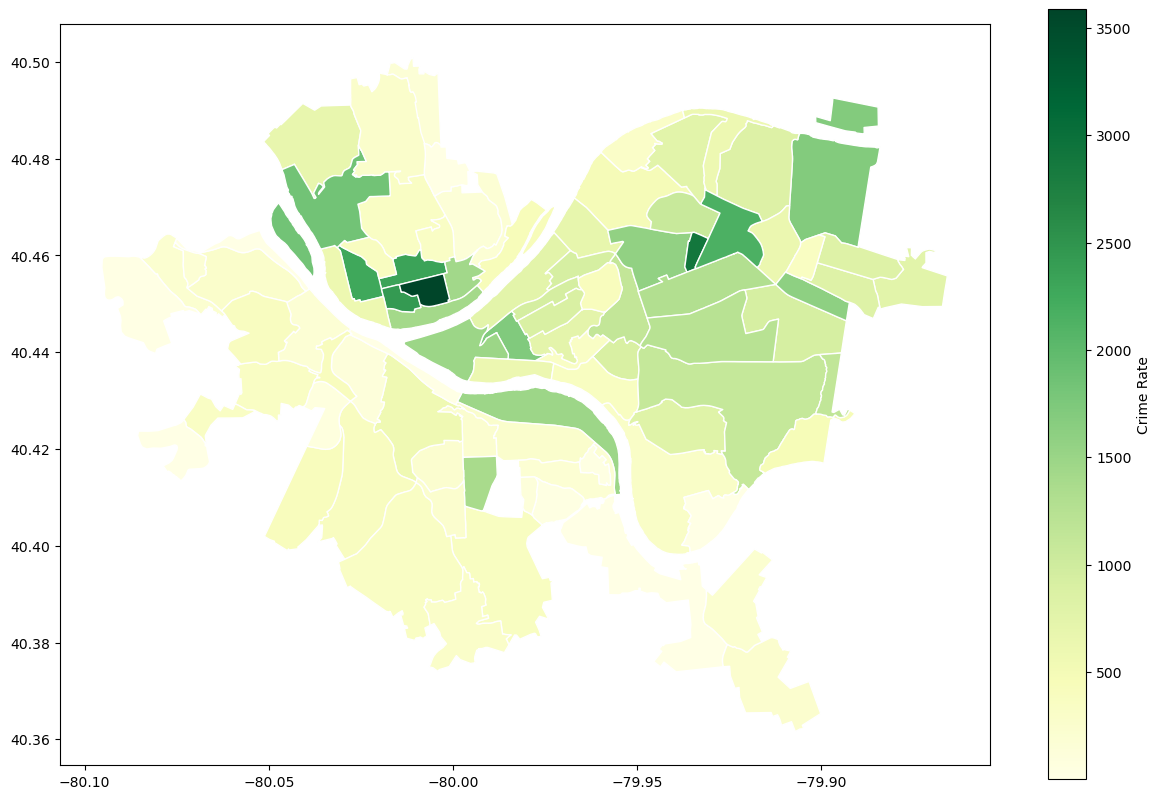

In [5]:
trees = pd.read_csv("trees_psqm.csv")

trees_map = neighborhoods.merge(trees, left_on="hood", right_on="neighborhood", how="left")
trees_map.plot(column="trees_sqmile", cmap="YlGn", edgecolor="white", legend=True, legend_kwds={'label': "Crime Rate"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
plt.show()

Great! Now let's put it all together

## The Best Neighborhood
We defined the "merged" metric as trees per square mile divided by the sum of crimes per capita and 311 complains per capita. We can calculate it by mergine all of our datasets like this:

In [6]:
crime.columns = ["neighborhood", "crime_per_capita"]
crime_and_311 = crime.merge(complaints, how="left", on="neighborhood")

# and add some trees into the mix:

merged = crime_and_311.merge(trees, how="left", on="neighborhood")

# and now let's calculate the "ultimate" metric:

merged["ultimate"] = merged["trees_sqmile"]/(merged["crime_per_capita"] + merged["Complaints_per_capita"])

# and let's sort it

sorted_df = merged.sort_values(by="ultimate", ascending=False)
sorted_df.head()

,neighborhood,crime_per_capita,Complaints_per_capita,trees_sqmile,ultimate
33,Friendship,0.008964,0.179272,2886.792453,15336.084906
6,Squirrel Hill North,0.003256,0.122151,1243.044190,9912.077985
27,Point Breeze North,0.008277,0.206426,1597.902098,7442.383014
16,Shadyside,0.006037,0.181674,1294.245385,6894.879226
72,Allegheny West,0.021645,0.391775,2425.531915,5866.993428


#### And the winner is Friendship!
Let's look at this data on a map, just like before (the darker the better):

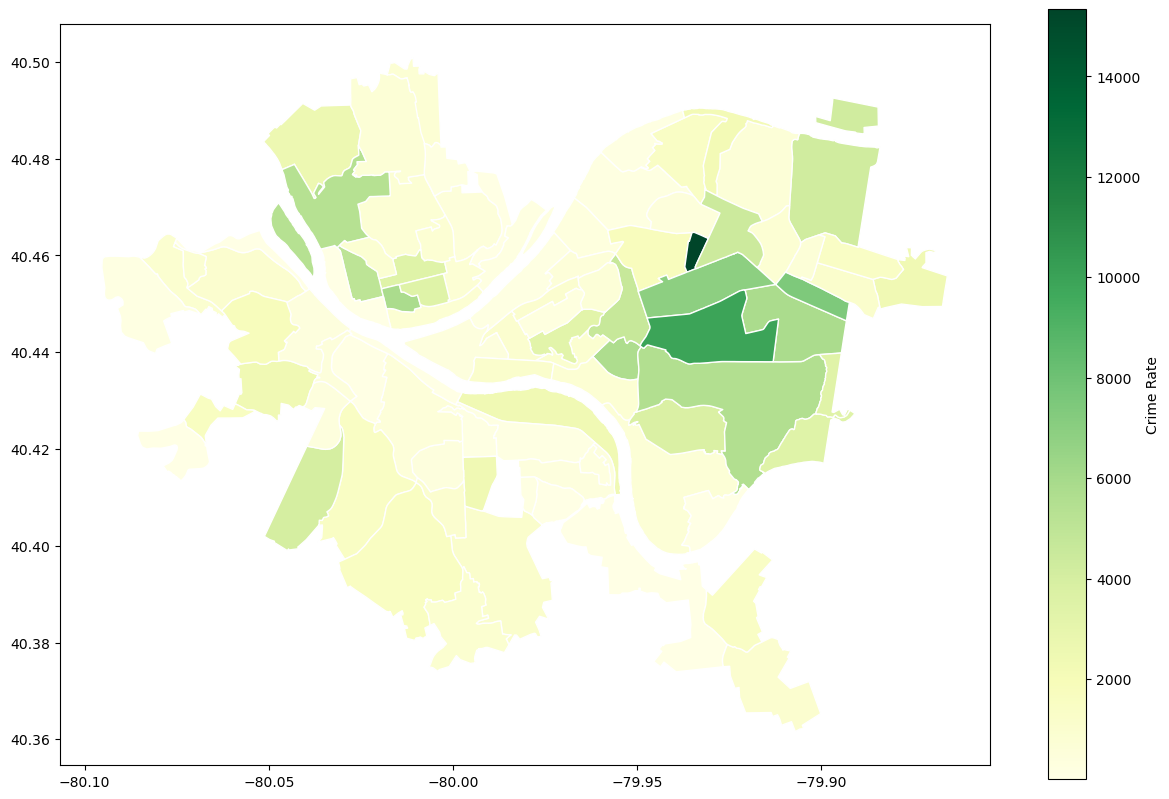

In [7]:
ultimate_map = neighborhoods.merge(sorted_df, left_on="hood", right_on="neighborhood", how="left")
ultimate_map.plot(column="ultimate", cmap="YlGn", edgecolor="white", legend=True, legend_kwds={'label': "Crime Rate"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
plt.show()

## Conclusions
Here are our conclusions
### Tucker's
I can't say I really should about which of the Pittsburgh Neighborhoods were my favorite. If I *had* to pick one, I would choose one of the Oakland Neighborhoods, maybe South O because that's where I'll be living next year. Oakland doesn't even come close to winning our data-driven approach, but can you really determine a single "best" neighborhood using only data, even if you had every dataset that exists on the neighborhoods?
### Victor's
I also don't have a particular "favorite" neighborhood. Obviously, I like Oakland, because I live here. I'm also partial to neighborhoods like Squirrel hill because I have friends who live there and have been there quite a bit. Ultimately, though, no matter how objective you try to be, it is impossible to find an objectively "best" neighborhood using data. The goal of data is to bring objectivity, of course, but things still depend a lot on subjective analysis. For example, people will value different things. Some people might value have a lot of trees where they live, others might not care as much. The data you choose to analyze will affect your results, and how you weight different aspects of quality can drastically change your results.

### Colin's
To be honest I don't particuarly have a favorite neighborhood. I like Shady Side because I am the most familiar with it. But I feel as a obersever or even like a data analyst it would be very hard to determine the absloute best or worst neighborhoods. There are so man factors to build in that can even be close to determine the best one. Other people can also judge specific attributes to justify which they think are best too. I feel its ultimatley opinionated, but can also be proved based on specific factors.